# EigenAnalysis of Burgers NeuralPDEs for Stability
Autoregressive Training

Publication quality

In [2]:
import numpy as np
import os
print(os.getcwd())
import matplotlib.pyplot as plt

T = 0.5                       # total time 
nt = 50                # number of timesteps
dt = T / nt                     # time step

theta = np.arange(-np.pi,np.pi,0.01)
x=np.cos(theta)
y=np.sin(theta)

/Users/arvindm/Documents/RESOURCES/myPublications/NMI_2025/code_submission_final/advdiff


### Analysis on IC inside Train Set

In [3]:
data1 = np.load("./Expt1/telemetry_caseA_expt1_inference_train.npz")
du0_pred_inference_train1 = np.asarray(data1['du0_pred_inference_train'])
Jpred_train1_t0 = np.squeeze(du0_pred_inference_train1[:,:,0])
Jpred_train1_t10 = np.squeeze(du0_pred_inference_train1[:,:,10])
Jpred_train1_t15 = np.squeeze(du0_pred_inference_train1[:,:,15])
Jpred_train1_t25 = np.squeeze(du0_pred_inference_train1[:,:,25])
Jpred_train1_t35 = np.squeeze(du0_pred_inference_train1[:,:,35])
Jpred_train1_t45 = np.squeeze(du0_pred_inference_train1[:,:,45])


data2 = np.load("./Expt2/telemetry_caseA_expt2b_inference_train.npz")
du0_pred_inference_train2 = np.asarray(data2['du0_pred_inference_train'])
Jpred_train2_t0 = np.squeeze(du0_pred_inference_train2[:,:,0])
Jpred_train2_t10 = np.squeeze(du0_pred_inference_train2[:,:,10])
Jpred_train2_t15 = np.squeeze(du0_pred_inference_train2[:,:,15])
Jpred_train2_t25 = np.squeeze(du0_pred_inference_train2[:,:,25])
Jpred_train2_t35 = np.squeeze(du0_pred_inference_train2[:,:,35])
Jpred_train2_t45 = np.squeeze(du0_pred_inference_train2[:,:,45])


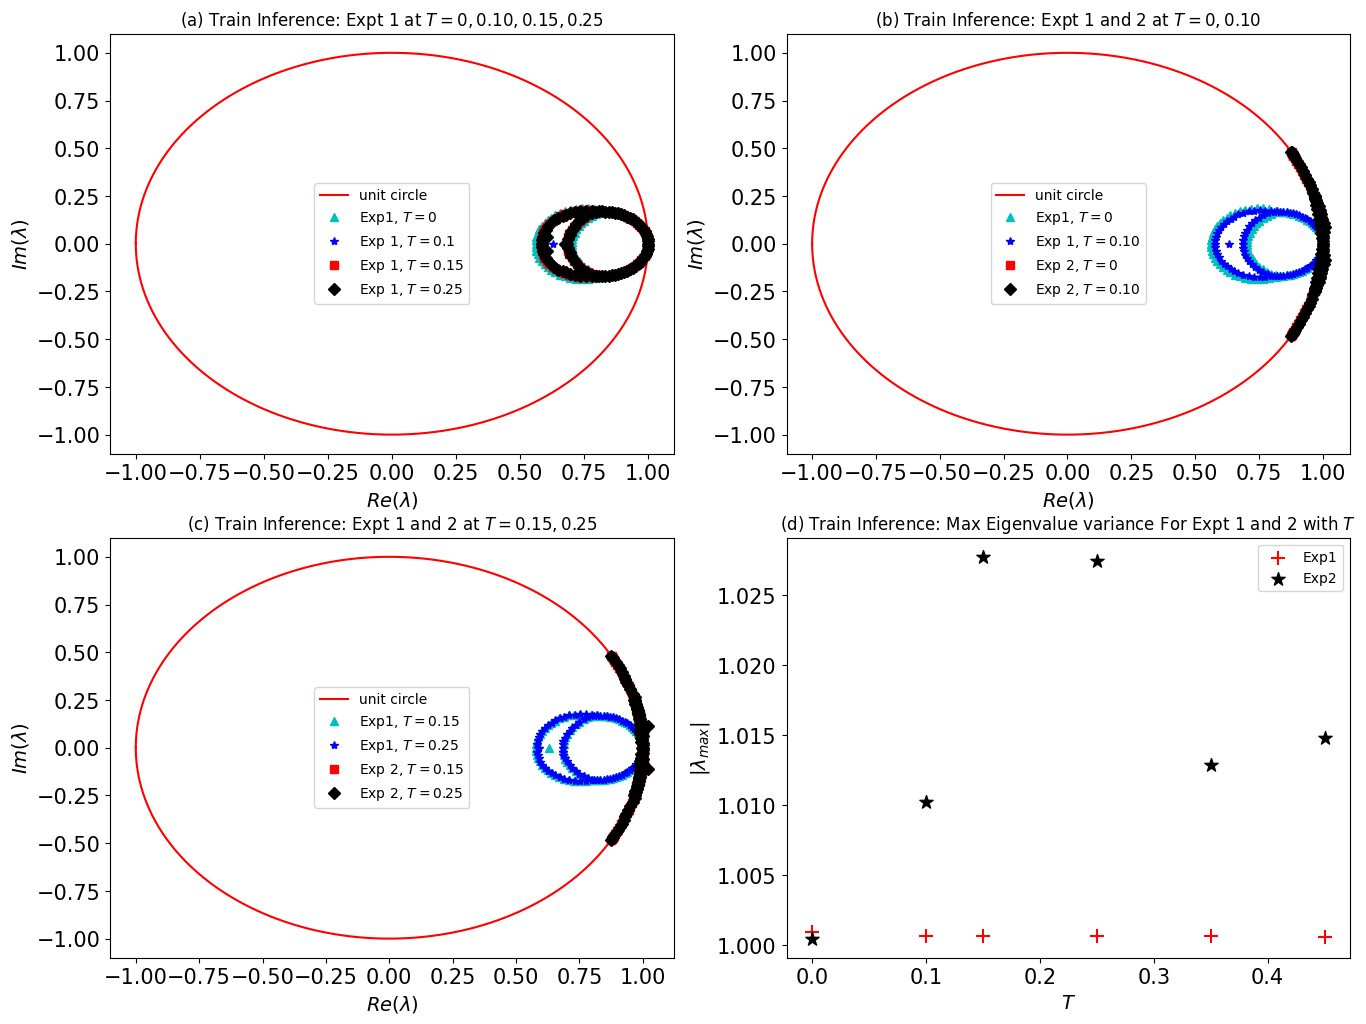

In [4]:
[etrue_train1_t0,_]=np.linalg.eig(Jpred_train1_t0)
[etrue_train1_t10,_]=np.linalg.eig(Jpred_train1_t10)
[etrue_train1_t15,_]=np.linalg.eig(Jpred_train1_t15)
[etrue_train1_t25,_]=np.linalg.eig(Jpred_train1_t25)
[etrue_train1_t35,_]=np.linalg.eig(Jpred_train1_t35)
[etrue_train1_t45,_]=np.linalg.eig(Jpred_train1_t45)

# Compute eigenvals
[etrue_train2_t0,_]=np.linalg.eig(Jpred_train2_t0)
[etrue_train2_t10,_]=np.linalg.eig(Jpred_train2_t10)
[etrue_train2_t15,_]=np.linalg.eig(Jpred_train2_t15)
[etrue_train2_t25,_]=np.linalg.eig(Jpred_train2_t25)
[etrue_train2_t35,_]=np.linalg.eig(Jpred_train2_t35)

[etrue_train2_t45,_]=np.linalg.eig(Jpred_train2_t45)


diff_numerics_IC = np.zeros([6])
same_numerics_IC = np.zeros([6])
time_step = np.array([0,10,15,25,35,45])*dt #normalize to real Time.

diff_numerics_IC[0] = np.max(np.abs(etrue_train2_t0))
diff_numerics_IC[1] = np.max(np.abs(etrue_train2_t10))
diff_numerics_IC[2] = np.max(np.abs(etrue_train2_t15))
diff_numerics_IC[3] = np.max(np.abs(etrue_train2_t25))
diff_numerics_IC[4] = np.max(np.abs(etrue_train2_t35))
diff_numerics_IC[5] = np.max(np.abs(etrue_train2_t45))

same_numerics_IC[0] = np.max(np.abs(etrue_train1_t0))
same_numerics_IC[1] = np.max(np.abs(etrue_train1_t10))
same_numerics_IC[2] = np.max(np.abs(etrue_train1_t15))
same_numerics_IC[3] = np.max(np.abs(etrue_train1_t25))
same_numerics_IC[4] = np.max(np.abs(etrue_train1_t35))
same_numerics_IC[5] = np.max(np.abs(etrue_train1_t45))

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 12]

fig, ax = plt.subplots(2, 2)
ax[0,0].plot(x,y,'-r',label='unit circle')
ax[0, 0].plot(np.real(etrue_train1_t0), np.imag(etrue_train1_t0), 'c^', label=r'Exp1, $T=0$')  # Cyan triangles
ax[0, 0].plot(np.real(etrue_train1_t10), np.imag(etrue_train1_t10), 'b*', label=r'Exp 1, $T=0.1$')  # Blue stars
ax[0, 0].plot(np.real(etrue_train1_t15), np.imag(etrue_train1_t15), 'rs', label=r'Exp 1, $T=0.15$')  # Red squares
ax[0, 0].plot(np.real(etrue_train1_t25), np.imag(etrue_train1_t25), 'kD', label=r'Exp 1, $T=0.25$')  # Black diamonds
ax[0,0].set_xlabel(r'$Re(\lambda)$', fontsize=14)
ax[0,0].set_ylabel(r'$Im(\lambda)$',fontsize=14)
ax[0,0].xaxis.set_tick_params(labelsize=15)
ax[0,0].yaxis.set_tick_params(labelsize=15)
ax[0,0].legend()

ax[0,1].plot(x,y,'-r',label='unit circle')
ax[0,1].plot(np.real(etrue_train1_t0),np.imag(etrue_train1_t0),'c^',label= r'Exp1, $T=0$')
ax[0,1].plot(np.real(etrue_train1_t10),np.imag(etrue_train1_t10),'b*',label=r'Exp 1, $T=0.10$')
ax[0,1].plot(np.real(etrue_train2_t0),np.imag(etrue_train2_t10),'rs',label=r'Exp 2, $T=0$')
ax[0,1].plot(np.real(etrue_train2_t10),np.imag(etrue_train2_t10),'kD',label=r'Exp 2, $T=0.10$')
ax[0,1].set_xlabel(r'$Re(\lambda)$', fontsize=14)
ax[0,1].set_ylabel(r'$Im(\lambda)$',fontsize=14)
ax[0,1].xaxis.set_tick_params(labelsize=15)
ax[0,1].yaxis.set_tick_params(labelsize=15)
ax[0,1].legend()


ax[1,0].plot(x,y,'-r',label='unit circle')
ax[1,0].plot(np.real(etrue_train1_t10),np.imag(etrue_train1_t10),'c^',label= r'Exp1, $T=0.15$')
ax[1,0].plot(np.real(etrue_train1_t15),np.imag(etrue_train1_t15),'b*',label=r'Exp1, $T=0.25$')
ax[1,0].plot(np.real(etrue_train2_t10),np.imag(etrue_train2_t10),'rs',label=r'Exp 2, $T=0.15$')
ax[1,0].plot(np.real(etrue_train2_t15),np.imag(etrue_train2_t15),'kD',label=r'Exp 2, $T=0.25$')
ax[1,0].set_xlabel(r'$Re(\lambda)$', fontsize=14)
ax[1,0].set_ylabel(r'$Im(\lambda)$',fontsize=14)
ax[1,0].xaxis.set_tick_params(labelsize=15)
ax[1,0].yaxis.set_tick_params(labelsize=15)
ax[1,0].legend()

ax[1,1].scatter(time_step,same_numerics_IC, marker='+', color='red',label='Exp1',s=100)
ax[1,1].scatter(time_step,diff_numerics_IC, marker='*',color='black',label='Exp2',s=100)
ax[1,1].set_xlabel('$T$',fontsize=14)
ax[1,1].set_ylabel(r'$|\lambda_{max}|$',fontsize=14)
ax[1,1].xaxis.set_tick_params(labelsize=15)
ax[1,1].yaxis.set_tick_params(labelsize=15)
ax[1,1].legend()

ax[0,0].title.set_text('(a) Train Inference: Expt 1 at $T=0,0.10,0.15,0.25$')
ax[0,1].title.set_text('(b) Train Inference: Expt 1 and 2 at $T=0,0.10$')
ax[1,0].title.set_text('(c) Train Inference: Expt 1 and 2 at $T=0.15,0.25$')
ax[1,1].title.set_text('(d) Train Inference: Max Eigenvalue variance For Expt 1 and 2 with $T$')

plt.savefig("burgers_eigenstability_train.png", format='png')

### Analysis on IC outside Train Set

In [5]:
data1_test = np.load("./Expt1/telemetry_caseA_expt1_inference_test.npz")
du0_pred_inference_test1 = np.asarray(data1_test['du0_pred_inference_test'])
Jpred_test1_t0 = np.squeeze(du0_pred_inference_test1[:, :, 0])
Jpred_test1_t10 = np.squeeze(du0_pred_inference_test1[:, :, 10])
Jpred_test1_t15 = np.squeeze(du0_pred_inference_test1[:, :, 15])
Jpred_test1_t25 = np.squeeze(du0_pred_inference_test1[:, :, 25])
Jpred_test1_t35 = np.squeeze(du0_pred_inference_test1[:, :, 35])
Jpred_test1_t45 = np.squeeze(du0_pred_inference_test1[:, :, 45])

data2_test = np.load("./Expt2/telemetry_caseA_expt2b_inference_test.npz")
du0_pred_inference_test2 = np.asarray(data2_test['du0_pred_inference_test'])
Jpred_test2_t0 = np.squeeze(du0_pred_inference_test2[:, :, 0])
Jpred_test2_t10 = np.squeeze(du0_pred_inference_test2[:, :, 10])
Jpred_test2_t15 = np.squeeze(du0_pred_inference_test2[:, :, 15])
Jpred_test2_t25 = np.squeeze(du0_pred_inference_test2[:, :, 25])
Jpred_test2_t35 = np.squeeze(du0_pred_inference_test2[:, :, 35])
Jpred_test2_t45 = np.squeeze(du0_pred_inference_test2[:, :, 45])


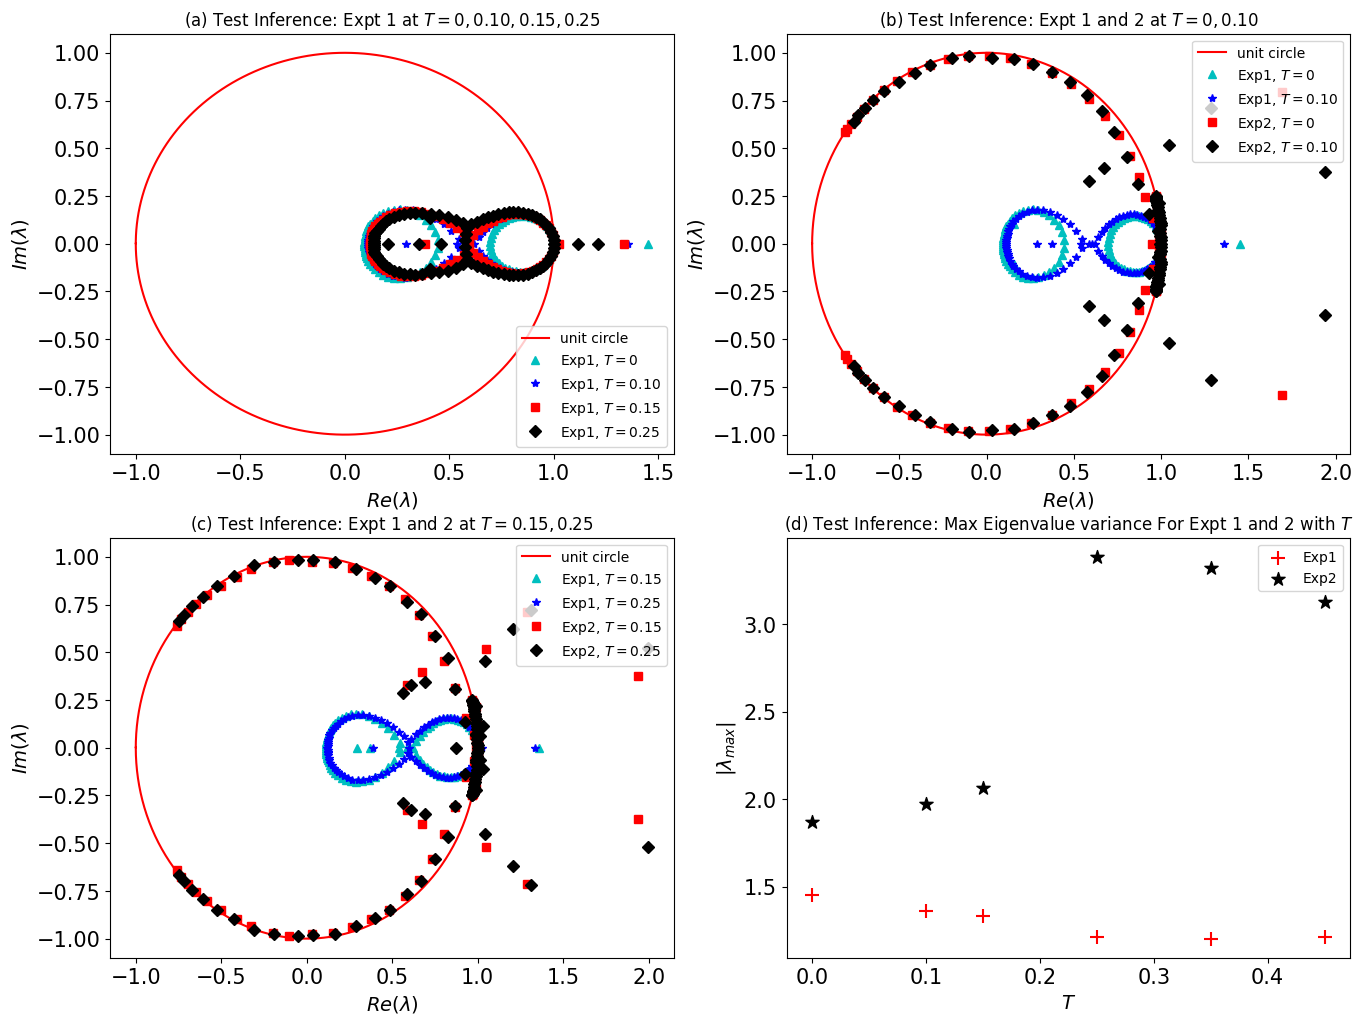

In [6]:
[etrue_test1_t0, _] = np.linalg.eig(Jpred_test1_t0)
[etrue_test1_t10, _] = np.linalg.eig(Jpred_test1_t10)
[etrue_test1_t15, _] = np.linalg.eig(Jpred_test1_t15)
[etrue_test1_t25, _] = np.linalg.eig(Jpred_test1_t25)
[etrue_test1_t35, _] = np.linalg.eig(Jpred_test1_t35)
[etrue_test1_t45, _] = np.linalg.eig(Jpred_test1_t45)

[etrue_test2_t0, _] = np.linalg.eig(Jpred_test2_t0)
[etrue_test2_t10, _] = np.linalg.eig(Jpred_test2_t10)
[etrue_test2_t15, _] = np.linalg.eig(Jpred_test2_t15)
[etrue_test2_t25, _] = np.linalg.eig(Jpred_test2_t25)
[etrue_test2_t35, _] = np.linalg.eig(Jpred_test2_t35)
[etrue_test2_t45, _] = np.linalg.eig(Jpred_test2_t45)

diff_numerics_IC = np.zeros([6])
same_numerics_IC = np.zeros([6])
time_step = np.array([0,10,15,25,35,45])*dt #normalize to real Time.

diff_numerics_IC[0] = np.max(np.abs(etrue_test2_t0))
diff_numerics_IC[1] = np.max(np.abs(etrue_test2_t10))
diff_numerics_IC[2] = np.max(np.abs(etrue_test2_t15))
diff_numerics_IC[3] = np.max(np.abs(etrue_test2_t25))
diff_numerics_IC[4] = np.max(np.abs(etrue_test2_t35))
diff_numerics_IC[5] = np.max(np.abs(etrue_test2_t45))

same_numerics_IC[0] = np.max(np.abs(etrue_test1_t0))
same_numerics_IC[1] = np.max(np.abs(etrue_test1_t10))
same_numerics_IC[2] = np.max(np.abs(etrue_test1_t15))
same_numerics_IC[3] = np.max(np.abs(etrue_test1_t25))
same_numerics_IC[4] = np.max(np.abs(etrue_test1_t35))
same_numerics_IC[5] = np.max(np.abs(etrue_test1_t45))

plt.rcParams['figure.figsize'] = [16, 12]
fig, ax = plt.subplots(2, 2)

# Subplot (0, 0)
ax[0, 0].plot(x, y, '-r', label='unit circle')
ax[0, 0].plot(np.real(etrue_test1_t0), np.imag(etrue_test1_t0), 'c^', label=r'Exp1, $T=0$')
ax[0, 0].plot(np.real(etrue_test1_t10), np.imag(etrue_test1_t10), 'b*', label=r'Exp1, $T=0.10$')
ax[0, 0].plot(np.real(etrue_test1_t15), np.imag(etrue_test1_t15), 'rs', label=r'Exp1, $T=0.15$')
ax[0, 0].plot(np.real(etrue_test1_t25), np.imag(etrue_test1_t25), 'kD', label=r'Exp1, $T=0.25$')
ax[0, 0].set_xlabel(r'$Re(\lambda)$', fontsize=14)
ax[0, 0].set_ylabel(r'$Im(\lambda)$', fontsize=14)
ax[0, 0].xaxis.set_tick_params(labelsize=15)
ax[0, 0].yaxis.set_tick_params(labelsize=15)
ax[0, 0].legend()

# Subplot (0, 1)
ax[0, 1].plot(x, y, '-r', label='unit circle')
ax[0, 1].plot(np.real(etrue_test1_t0), np.imag(etrue_test1_t0), 'c^', label=r'Exp1, $T=0$')
ax[0, 1].plot(np.real(etrue_test1_t10), np.imag(etrue_test1_t10), 'b*', label=r'Exp1, $T=0.10$')
ax[0, 1].plot(np.real(etrue_test2_t0), np.imag(etrue_test2_t0), 'rs', label=r'Exp2, $T=0$')
ax[0, 1].plot(np.real(etrue_test2_t10), np.imag(etrue_test2_t10), 'kD', label=r'Exp2, $T=0.10$')
ax[0, 1].set_xlabel(r'$Re(\lambda)$', fontsize=14)
ax[0, 1].set_ylabel(r'$Im(\lambda)$', fontsize=14)
ax[0, 1].xaxis.set_tick_params(labelsize=15)
ax[0, 1].yaxis.set_tick_params(labelsize=15)
ax[0, 1].legend()

# Subplot (1, 0)
ax[1, 0].plot(x, y, '-r', label='unit circle')
ax[1, 0].plot(np.real(etrue_test1_t10), np.imag(etrue_test1_t10), 'c^', label=r'Exp1, $T=0.15$')
ax[1, 0].plot(np.real(etrue_test1_t15), np.imag(etrue_test1_t15), 'b*', label=r'Exp1, $T=0.25$')
ax[1, 0].plot(np.real(etrue_test2_t10), np.imag(etrue_test2_t10), 'rs', label=r'Exp2, $T=0.15$')
ax[1, 0].plot(np.real(etrue_test2_t15), np.imag(etrue_test2_t15), 'kD', label=r'Exp2, $T=0.25$')
ax[1, 0].set_xlabel(r'$Re(\lambda)$', fontsize=14)
ax[1, 0].set_ylabel(r'$Im(\lambda)$', fontsize=14)
ax[1, 0].xaxis.set_tick_params(labelsize=15)
ax[1, 0].yaxis.set_tick_params(labelsize=15)
ax[1, 0].legend()

# Subplot (1, 1)
ax[1, 1].scatter(time_step, same_numerics_IC, marker='+', color='red', label='Exp1', s=100)
ax[1, 1].scatter(time_step, diff_numerics_IC, marker='*', color='black', label='Exp2', s=100)
ax[1, 1].set_xlabel('$T$', fontsize=14)
ax[1, 1].set_ylabel(r'$|\lambda_{max}|$', fontsize=14)
ax[1, 1].xaxis.set_tick_params(labelsize=15)
ax[1, 1].yaxis.set_tick_params(labelsize=15)
ax[1, 1].legend()

ax[0,0].title.set_text('(a) Test Inference: Expt 1 at $T=0,0.10,0.15,0.25$')
ax[0,1].title.set_text('(b) Test Inference: Expt 1 and 2 at $T=0,0.10$')
ax[1,0].title.set_text('(c) Test Inference: Expt 1 and 2 at $T=0.15,0.25$')
ax[1,1].title.set_text('(d) Test Inference: Max Eigenvalue variance For Expt 1 and 2 with $T$')

plt.savefig("burgers_eigenstability_test.png", format='png')
